# **Black Friday Sales Prediction**

A companhia *ABC Private Limited* gostaria de entender o comportamento de seus clientes (especificamente, a quantidade de compras) em relação a vários produtos de diferentes categorias. Eles compartilharam um resumo de compras de vários clientes.

O conjunto de dados também contém informações demográficas (idade, gênero, status matrimonial, cidade, tempo de moradia na cidade), detalhes dos produtos (identificação e categoria) e o total de compras do último mês.

Agora eles querem construir um modelo que preveja o volume de vendas dos clientes em relação a vários produtos que ajudarão a criar uma oferta personalizada para os consumidores de diferentes produtos.

**Dicionário de Dados**

``User_ID``: User ID<br>
``Product_ID``: Product ID<br>
``Gender``: Sex of User<br>
``Age``: Age in bins<br>
``Occupation``: Occupation (Masked)<br>
``City_Category``: Category of the City (A,B,C)<br>
``Stay_In_Current_City_Years``: Number of years stay in current city<br>
``Marital_Status``: Marital Status<br>
``Product_Category_1``: Product Category (Masked)<br>
``Product_Category_2``: Product may belongs to other category also (Masked)<br>
``Product_Category_3``:Product may belongs to other category also (Masked)<br>
``Purchase``: Purchase Amount (Target Variable)<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

In [4]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


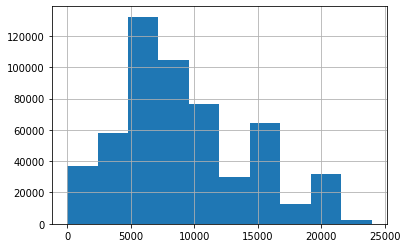

In [6]:
df_train.Purchase.hist();

In [3]:
df_test['Purchase'] = -1

In [4]:
df = pd.concat([df_train,df_test])

In [142]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,-1
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,-1
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,-1
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,-1


In [28]:
df.isna().mean().nlargest(df.shape[0]) * 100

Product_Category_3            69.648078
Product_Category_2            31.388587
User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Purchase                       0.000000
dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    783667 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 77.7+ MB


In [5]:
df2 = df.fillna(0)

In [147]:
df2.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,6.754454,3.845165,6502.224979
std,1.727267e+03,6.522206,0.491793,3.878160,6.216205,6.252476,5972.471365
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,0.000000,0.000000,-1.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,5.000000,0.000000,6062.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,9927.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [35]:
df2.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
sns.catplot(data=df2, y='Purchase', x= 'City_Category', hue='Gender', kind='swarm' );

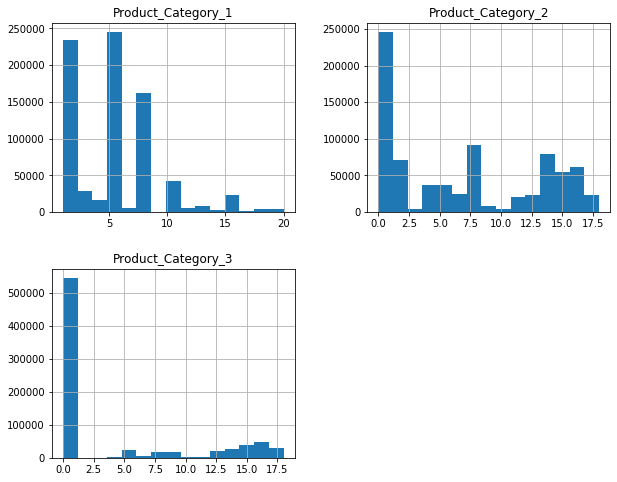

In [72]:
df2[['Product_Category_1','Product_Category_2','Product_Category_3']].hist(figsize=(10,8), bins=15);

In [148]:
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [149]:
df2.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [158]:
df2.Age.value_counts(dropna = False)

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [6]:
age_dict = {'0-17': 1, '18-25': 2, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
gender_dict = {'F': 0, 'M': 1}
city_cat_dict = {'A':0, 'B': 1, 'C': 2}
stay_city_dict = {'0':0, '1':1, '2':2, '3':3, '4+':4}

df3 = df2

df3['Age'] = df3['Age'].map(age_dict)
df3['City_Category'] = df3['City_Category'].map(city_cat_dict)
df3['Gender'] = df3['Gender'].map(gender_dict)
df3['Stay_In_Current_City_Years'] = df3['Stay_In_Current_City_Years'].map(stay_city_dict)

In [160]:
df3.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,1,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969


In [7]:
def normalize(dframe):
    dframe = (dframe - dframe.mean()) / dframe.std()
    return dframe

In [8]:
df4 = df3[df3.Purchase != -1]
test = df3[df3.Purchase == -1]

In [9]:
test_ids = test[['User_ID', 'Product_ID']]
X_test = test.drop(columns=['User_ID', 'Product_ID', 'Purchase'])

In [10]:
X_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,1,11.0,0.0
1,1,2,17,2,0,0,3,5.0,0.0
2,0,3,1,1,4,1,5,14.0,0.0
3,0,3,1,1,4,1,4,9.0,0.0
4,0,2,1,2,1,0,4,5.0,12.0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df5 = df4.drop(['User_ID', 'Product_ID'], axis=1)
df5.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,0.0,0.0,8370
1,0,1,10,0,2,0,1,6.0,14.0,15200
2,0,1,10,0,2,0,12,0.0,0.0,1422
3,0,1,10,0,2,0,12,14.0,0.0,1057
4,1,6,16,2,4,0,8,0.0,0.0,7969


In [13]:
X = df5.drop('Purchase', axis=1)
y = df5.Purchase

In [14]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.33, random_state=24)

In [15]:
X_train.shape

(368545, 9)

In [16]:
X_validate.shape

(181523, 9)

In [189]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
X_train = normalize(X_train)
X_validate = normalize(X_validate)

In [192]:
rf = RandomForestRegressor()

In [193]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [194]:
rf_pred = rf.predict(X_validate)

In [18]:
from sklearn.metrics import mean_squared_error

In [197]:
mean_squared_error(y_validate, rf_pred)

9297663.2245156

In [19]:
from xgboost import XGBRegressor

In [21]:
xgb = XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                                                                                 
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.75,
             reg_lambda=0.45, scale_pos_weight=1, seed=42, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
xgb_pred = xgb.predict(X_validate)

In [23]:
mean_squared_error(y_validate, xgb_pred)

11287353.065235808